In [4]:
import pandas as pd #data processing and csv i/o library
import numpy as np #linear algebra
import warnings # the current version of seaborn will generate a bunch of warnings that we will ignore
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotib inline
sns.set(style='white',colour_codes=True)

UsageError: Line magic function `%matplotib` not found.


In [5]:
training=pd.read_csv('trainingset.xls')
testing=pd.read_csv('testingset.xls')


In [6]:
training.head()

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
0,0,1,0,0,1,1,1,7,12,19,7,4,9,1
1,2,1,0,0,1,1,1,6,8,8,6,4,10,-1
2,3,9,0,3,1,1,1,24,22,33,13,11,33,1
3,0,1,0,0,1,1,1,1,1,2,1,2,4,-1
4,0,1,0,0,1,1,1,7,10,15,8,8,12,-1


In [11]:
testing.head()

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
0,1,5,0,1,3,2,1,18,30,50,13,12,24,1
1,0,1,0,0,1,1,1,10,10,12,10,6,16,-1
2,0,7,0,0,4,4,1,21,30,46,19,11,25,1
3,0,1,0,0,1,1,1,2,4,3,4,2,5,-1
4,0,1,0,0,1,1,1,4,4,7,3,6,6,-1


In [12]:
training.info()
training.query('LOC_BLANK'>'BRANCH_COUNT')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 14 columns):
LOC_BLANK                364 non-null int64
BRANCH_COUNT             364 non-null int64
LOC_CODE_AND_COMMENT     364 non-null int64
LOC_COMMENTS             364 non-null int64
CYCLOMATIC_COMPLEXITY    364 non-null int64
DESIGN_COMPLEXITY        364 non-null int64
ESSENTIAL_COMPLEXITY     364 non-null int64
LOC_EXECUTABLE           364 non-null int64
NUM_OPERANDS             364 non-null int64
NUM_OPERATORS            364 non-null int64
NUM_UNIQUE_OPERANDS      364 non-null int64
NUM_UNIQUE_OPERATORS     364 non-null int64
LOC_TOTAL                364 non-null int64
DEFECTIVE                364 non-null int64
dtypes: int64(14)
memory usage: 39.9 KB


ValueError: expr must be a string to be evaluated, <class 'bool'> given

In [13]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 14 columns):
LOC_BLANK                136 non-null int64
BRANCH_COUNT             136 non-null int64
LOC_CODE_AND_COMMENT     136 non-null int64
LOC_COMMENTS             136 non-null int64
CYCLOMATIC_COMPLEXITY    136 non-null int64
DESIGN_COMPLEXITY        136 non-null int64
ESSENTIAL_COMPLEXITY     136 non-null int64
LOC_EXECUTABLE           136 non-null int64
NUM_OPERANDS             136 non-null int64
NUM_OPERATORS            136 non-null int64
NUM_UNIQUE_OPERANDS      136 non-null int64
NUM_UNIQUE_OPERATORS     136 non-null int64
LOC_TOTAL                136 non-null int64
DEFECTIVE                136 non-null int64
dtypes: int64(14)
memory usage: 15.0 KB


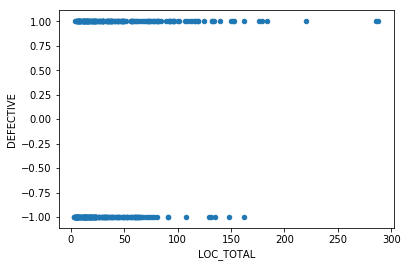

In [14]:
#scatter plot LOC_TOTAL AND DEFECTIVE
training.plot(kind='scatter', x='LOC_TOTAL', y='DEFECTIVE')

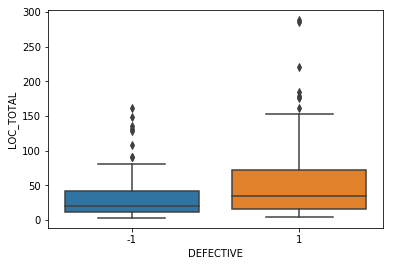

In [15]:
#we can look at the attribute/feature using seaborn through a boxplot
sns.boxplot(x='DEFECTIVE',y='LOC_TOTAL',data=training)


SPLITTING THE TRAINING DATA INTO TRAINING SET(||)

In [23]:
from sklearn.model_selection import train_test_split

In [66]:
training.shape

(364, 14)

In [65]:
train,train2=train_test_split(training,test_size=0.55) #validation set of 55%


In [67]:
train.shape

(163, 14)

In [79]:
train2.shape

(201, 14)

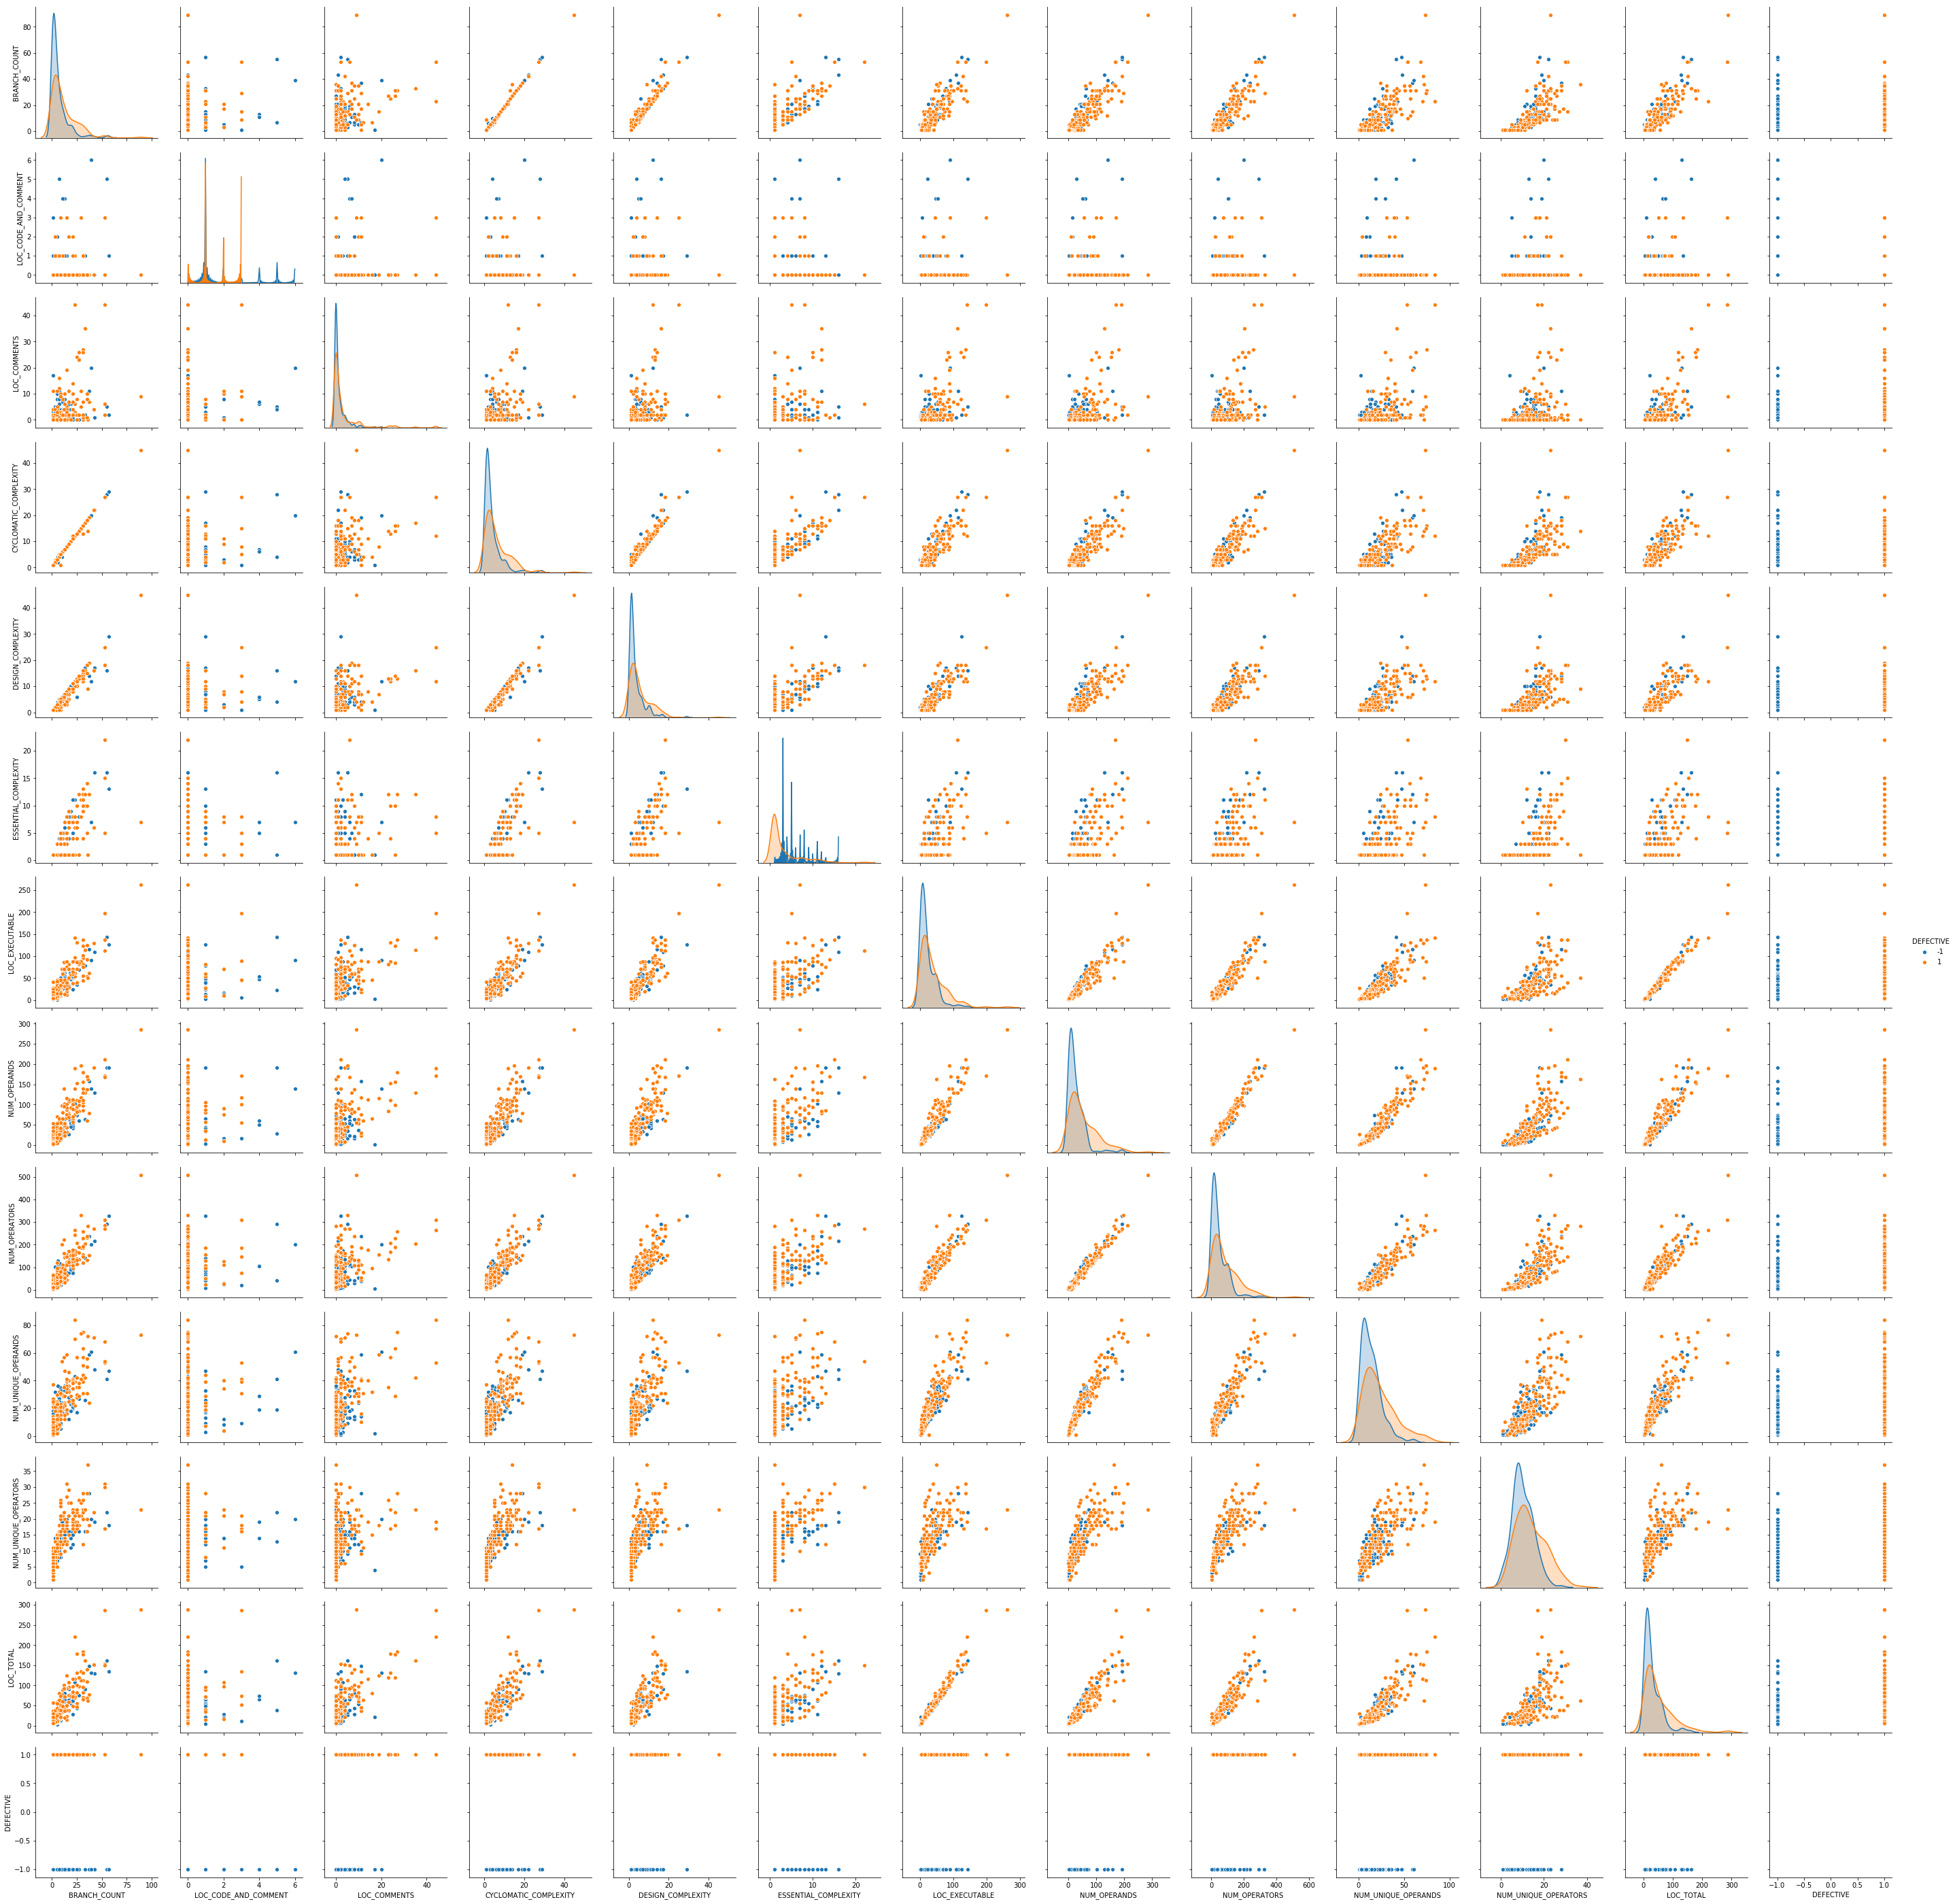

In [84]:
sns.pairplot(training.drop('LOC_BLANK', axis=1), hue='DEFECTIVE', height=3)

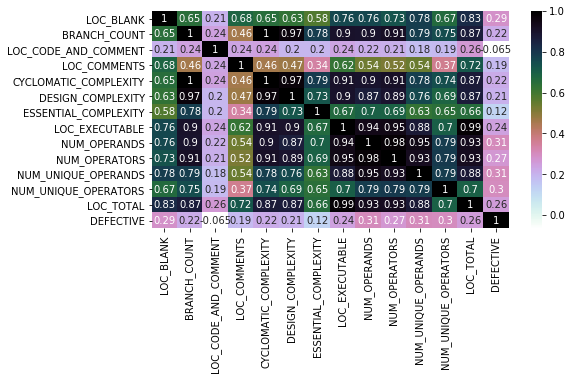

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(training.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()